Import libraries and Mount Google Drive

In [ ]:
import os, time, random
import numpy as np
import pandas as pd
import torch
from tqdm.auto import tqdm
import shutil as sh
from IPython.display import Image, clear_output, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display
import cv2
import numpy as np
from google.colab import drive
%matplotlib inline
drive.mount('/content/drive')

Mounted at /content/drive


Install Ultralytics YOLOv8.

In [ ]:
%cd '/content/drive/MyDrive/dataset'

/content/drive/MyDrive/dataset


In [ ]:
%%time
!pip install ultralytics==8.0.11
!pip install roboflow --quiet
!pip install roboflow


display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.11 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


CPU times: user 1.14 s, sys: 145 ms, total: 1.28 s
Wall time: 25.5 s


Unzip the dataset
(Done)

```
zip_file_path = '/content/drive/MyDrive/Dataset.zip'
target_directory = '/content/drive/MyDrive'
os.system(f'unzip {zip_file_path} -d {target_directory}')
```



Training

In [ ]:
!yolo task=detect mode=train model=/content/drive/MyDrive/dataset/yolov8s.pt data=data.yaml epochs=60 imgsz=640 v5loader=True

Ultralytics YOLOv8.0.11 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/dataset/yolov8s.pt, data=data.yaml, epochs=60, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False,

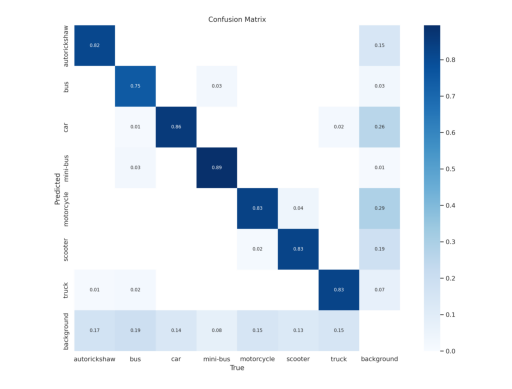

In [ ]:
Image = mpimg.imread('/content/drive/MyDrive/dataset/runs/detect/train4/confusion_matrix.png')
plt.imshow(Image)
plt.axis('off')
plt.show()

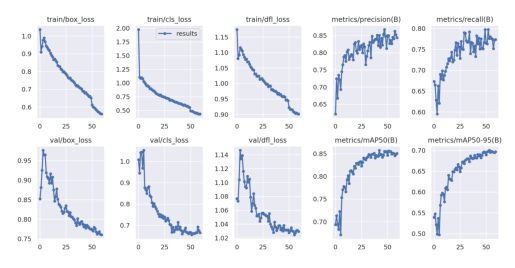

In [ ]:
Image = mpimg.imread('/content/drive/MyDrive/dataset/runs/detect/train4/results.png')
plt.imshow(Image)
plt.axis('off')
plt.show()

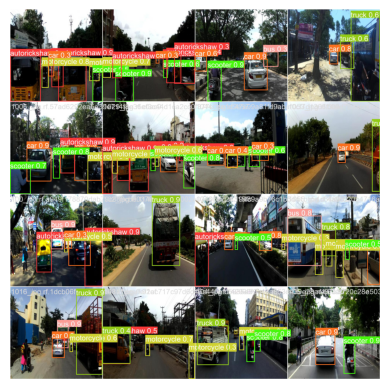

In [ ]:
Image = mpimg.imread('/content/drive/MyDrive/dataset/runs/detect/train4/val_batch0_pred.jpg')
plt.imshow(Image)
plt.axis('off')
plt.show()

Validation

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/dataset/runs/detect/train4/weights/best.pt data=/content/drive/MyDrive/dataset/data.yaml

2023-07-10 19:08:48.767900: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 19:08:49.799549: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.11 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing... 
Model summary: 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/drive/MyDrive/dataset/valid/labels... 675 images, 0 backgrounds, 0 corrupt: 100% 675/675 [03:17<00:00,  3.42it/s]
val: New cache created: /content/drive/MyDrive/dataset/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 43/43 [00:18<00:00,  2.36it/s]
                   all        675       3087      0.845 

Testing

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/dataset/runs/detect/train4/weights/best.pt conf=0.25 source=/content/drive/MyDrive/dataset/test/images

2023-07-10 19:12:58.517544: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 19:12:59.350239: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.11 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing... 
Model summary: 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
image 1/335 /content/drive/MyDrive/dataset/test/images/1017_jpg.rf.a4181cca96d34d8a31b900443d881d06.jpg: 640x640 1 bus, 2 motorcycles, 1 truck, 16.4ms
image 2/335 /content/drive/MyDrive/dataset/test/images/1019_jpg.rf.28dbee60d9774df2d2c6594546fb2292.jpg: 640x640 2 cars, 16.4ms
image 3/335 /content/drive/MyDrive/dataset/test/images/1027_jpg.rf.eaecc4e33592a083d79fddc94aa27eda.jpg: 640x640 1

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/dataset/runs/detect/predict/*.jpg')[:40]:
      display(Image(filename=image_path, width=600))
      print("\n")

Output hidden; open in https://colab.research.google.com to view.

Predict for specific images

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/dataset/runs/detect/train4/weights/best.pt conf=0.25 source=/content/drive/MyDrive/dataset/test/